In [22]:
# 1
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
# from __future_ _import division ~ how do you get the double bottom line
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
#data = pd.read_csv("DJIA_TOP20DOW_Train.csv")
data = pd.read_csv("DJIA_DATA_20_B.csv")
#datatest=pd.read_csv("DJIA_TOP20DOW_Test.csv")

# Success - Display the first record
#display(data.head(1))
#display(data.head(10))
#display(datatest.head(1))

terms = ['debt', 'stocks', 'restaurant', 'economics','portfolio', 'dow_jones', 'credit', 'revenue', 'inflation', 'housing', 
         'investment', 'return' , 'markets', 'unemployment', 'growth', 'hedge', 'money', 'derivatives', 'leverage']

new_relevant_terms = []

#indexes = [ 'DJIA_Close',  'NASDAQ_Close',  'SP_Close',]

indexes = [ 'DJIA_Close',  'NASDAQ_Close',  'SP_Close', 'R2000_Close']

index_volumes = ['DJIA_Volume',  'NASDAQ_Volume',  'SP_Volume', 'R2000_Volume']

stocks = ['MMM_Close', 'AXP_Close',  'APPL_Close', 'BA_Close',  'CAT_Close', 'CVX_Close', 
                  'CSCO_Close','KO_Close',  'DIS_Close', 'XOM_Close',  'GE_Close',  'GS_Close', 'HD_Close', 'IBM_Close',
                 'INTC_Close',  'JNJ_Close', 'JPM_Close',  'MCD_Close', 'MRK_Close',  'MSFT_Close', 'NKE_Close', 'PFE_Close',
                  'PG_Close', 'TRV_Close', 'UNH_Close', 'UTX_Close', 'VZ_Close',  'WMT_Close' ]

stock_volumes = ['MMM_Volume', 'AXP_Volume',  'APPL_Volume', 'BA_Volume',  'CAT_Volume', 'CVX_Volume', 
                  'CSCO_Volume','KO_Volume',  'DIS_Volume', 'XOM_Volume',  'GE_Volume',  'GS_Volume', 'HD_Volume', 'IBM_Volume',
                 'INTC_Volume',  'JNJ_Volume', 'JPM_Volume',  'MCD_Volume', 'MRK_Volume',  'MSFT_Volume', 'NKE_Volume', 'PFE_Volume',
                  'PG_Volume', 'TRV_Volume', 'UNH_Volume', 'UTX_Volume', 'VZ_Volume',  'WMT_Volume' ]
     

'''
     
data[terms] = data[terms].replace(r'\s+', np.nan, regex=True)
idx = ~data.debt.isnull()
data = data[idx]
data[terms] = data[terms].astype(int)

data, test_data = data[:417], data[417:]

'''


data.head()

,Date,DJIA_Close,DJIA_Volume,NASDAQ_Close,NASDAQ_Volume,SP_Close,SP_Volume,R2000_Close,R2000_Volume,week,...,TRV_Close,TRV_Volume,UNH_Close,UNH_Volume,UTX_Close,UTX_Volume,VZ_Close,VZ_Volume,WMT_Close,WMT_Volume
0,1/2/04,10409.84961,168890000,2006.680054,1666780000,1108.479980,1153200000,560.849976,11532000,NaN,...,39.599998,1036000.0,29.520000,6243600.0,47.180000,3227600.0,31.701128,8096200.0,52.299999,8793900.0
1,1/5/04,10544.07031,221290000,2047.359985,2362910000,1122.219971,1578200000,568.919983,15782000,1/4/04,...,39.700001,835900.0,28.100000,16714000.0,47.465000,3031000.0,32.618435,16917900.0,52.119999,13451400.0
2,1/6/04,10538.66016,191460000,2057.370117,2273220000,1123.670044,1494500000,569.890015,14945000,NaN,...,39.400002,1025600.0,28.389999,8181800.0,47.345001,3754200.0,33.158031,11114400.0,53.340000,13314500.0
3,1/7/04,10529.03027,225490000,2077.679932,2294280000,1126.329956,1704900000,574.619995,17049000,NaN,...,39.400002,1800600.0,28.655001,5916400.0,47.500000,3413200.0,32.879238,10416100.0,53.480000,12228900.0
4,1/8/04,10592.44043,237770000,2100.250000,2683950000,1131.920044,1868400000,579.619995,18684000,NaN,...,39.650002,2450800.0,28.715000,5619200.0,47.445000,3793200.0,33.382862,10160400.0,53.259998,13433600.0


In [23]:
#3
# relative change 
def relative_change_volume (volume, time, time_delta=3):
    if time < time_delta:
        return 0.0
    v = volume[time]
    sum = 0.0
    for i in range (1, time_delta + 1):
        sum = sum + volume[time - i] 
    average = sum/time_delta
    
    return    v - average

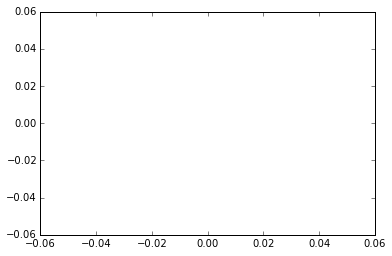

In [24]:
#4
# term signal visual shows that comparitive relative strenght of each trade (buy or sell) signall
term_signal = []
for i in range(len(test_data)):
    signal = relative_change_volume(test_data.debt.values,  i)
    term_signal.append(signal)
from matplotlib import pyplot
pyplot.plot(term_signal)
pyplot.show()

In [18]:
#5
#Function need to implement Google Trends Strategy and Random Strategy 

import numpy as np
import random
initial_investment = 10000

use_random_strategy = True

def DoStrategy(term='dow jones', Index = "R2000_Close", data = test_data, use_random_strategy=False, debug=False):
    money = 0.0
    position = 0.0
    longs = 0
    shorts = 0
    info = []
    
    for i in range(1, len(data)):

        # close our current position
        market_change = np.log(data[Index].values[i]) -  np.log(data[Index].values[i-1])
        money -= market_change * position
        info.append({
            'buy': data[Index].values[i-1],
            'sell': data[Index].values[i],
            'position': {-1: 'long', 0: 'neutral', 1: 'short'}[position],
            'week': i,
            'value': np.exp(money)
        })

        if use_random_strategy:
            position = random.choice([0.0, -1.0, 1.0])
        else:
            # figure out our new position
            signal = relative_change_volume(data[term].values,  i)
            position = np.sign(signal)
            
            if position == -1:
                shorts += 1
            if position == 1:
                longs += 1

        # print some statistics
        current_net_return = np.exp(money)
        
    if debug:
        return pd.DataFrame(info)
    return current_net_return, shorts, longs

#random_results = [DoStrategy(use_random_strategy=True) for i in range(1000)]
#pyplot.hist(random_results, 100)
#pyplot.show()

In [8]:
 # implementing Google Trend and Random Strategy on term specified on the test data ~ results show all trades made
DoStrategy('debt', data=test_data, debug=True)

,buy,position,sell,value,week
0,1277.060059,neutral,1280.699951,1.000000,1
1,1280.699951,neutral,1293.670044,1.000000,2
2,1293.670044,neutral,1316.000000,1.000000,3
3,1316.000000,short,1313.010010,1.002277,4
4,1313.010010,short,1344.329956,0.978926,5
5,1344.329956,short,1351.770020,0.973538,6
6,1351.770020,long,1362.209961,0.981057,7
7,1362.209961,long,1367.589966,0.984932,8
8,1367.589966,long,1364.329956,0.982584,9
9,1364.329956,long,1371.089966,0.987453,10


In [7]:
#6
#creates a result table that stores all trading results for all terms on all indexes
results = []
for index in indexes[:5]:
    random_results = [
        DoStrategy('debt', index, use_random_strategy=True)[0]  # just get the return not the number of longs/shorts
                          for i in range(200)]
    for term in terms:
        print term
        ret, longs, shorts = DoStrategy(term, index)
        test_ret, _, _ = DoStrategy(term, index, test_data)
        mu = np.mean(random_results)
        std = np.std(random_results)
        results.append({
                'term': term,
                'return': ret,
                'sig': (ret - mu) / std,
                'longs': longs,
                'shorts': shorts,
                'index': index,
                'test_ret': test_ret
            })
results = pd.DataFrame(results)


UnboundLocalError: local variable 'current_net_return' referenced before assignment

In [8]:
# 7
# Visual shows the results of all terms on all indexes
from matplotlib import pyplot
results['return']
results.sort_values('return', ascending=False)
pyplot.plot(np.log10(results['return']), np.log10(results.test_ret), 'ro')
pyplot.show()

TypeError: list indices must be integers, not str

In [12]:
#8
#compares DJIA debt search term results to random strategy on test data
# results here suggest that Preis' results were overfitted and that you can not consistently rely on the top twenty search terms as predictors
# not the return result for debt is  unprofitable (.802 )and its standard deviation above random strategy is a weak signal (.913)

term = 'debt'
# DJIA
ret = DoStrategy(term)
random_results = [DoStrategy(term, use_random_strategy=True) for i in range(1000)]
mu = np.mean(random_results)
std = np.std(random_results)
print 'the return was  {0}'.format(ret)
print 'which was {0} std above random'.format((ret - mu)/std)

the return was  (0.80204709518311279, 164, 132)
which was [   0.91340961  325.9217816   262.19385047] std above random


In [27]:
#9
##note that other terms that had lower returns than debt on the training data now have higher returns on the test data
# dow_jones on test data results are 1.521 and 2.286 standard deviations over the random strategy

term = 'dow_jones'
#DJIA
ret = DoStrategy(term)
random_results = [DoStrategy(term, use_random_strategy=True) for i in range(1000)]
mu = np.mean(random_results)
std = np.std(random_results)
print 'the return was  {0}'.format(ret)
print 'which was {0} std above random'.format((ret - mu)/std)

the return was  (1.5439665037981107, 167, 125)
which was [   2.39629296  331.97277643  248.31180612] std above random


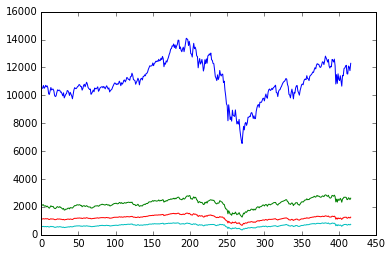

In [15]:
# 11
# Below we see how much higher the DJIA (blue) is over the other indexes 
# Identifying the highest performance term for shorting the DJIA shows great profit potential if we enter a bear market

pyplot.plot(data.DJIA_Close)
pyplot.plot(data.NASDAQ_Close)
pyplot.plot(data.SP_Close)
pyplot.plot(data.R2000_Close)
pyplot.show()

In [19]:
#12
#SUPERVISED LEARNING
# Split the data into features and target label ~ seperate the signal from the noise

#data_raw = data['Closing_Price']
#data_raw = data.droptest('Closing_Price', axis = 1)

#test_data_raw = data['Closing_Price']
#test_data_raw = data.droptest('Closing_Price', axis = 1)

# Visualize skewed continuous features of original data vs.distribution(da


In [1]:
#13
# lagging indicators
class MovingAvg(object):
  
  def __init__(self, d, burn_in=0):
    self.val=None
    self.p= 1 - 2.0 / (d + 1.0)
    self.burn_in=burn_in

  def Update(self, v):
    if self.burn_in > 0:
      self.burn_in -= 1
      return v

    if self.val is None:
      self.val = v
      return v
    self.val = self.p * self.val + (1.0 - self.p) * v
    return self.val

In [ ]:
#14
# leading indicators
# 

In [ ]:
#14.5
# breakout indicators
# 

In [36]:
#15
## OBSERVE DATA DISTRIBUTION AND CORRECT OUTLINERS
# Log-transform the skewed features ~ discover the skewed features 
#skewed = ['terms', indexes', 'index_volumes']
#features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
#vs.distribution(features_raw, transformed = True)

In [ ]:
#16
# Visualize the log transformed distributions of each continuous data  feature.. 
# Log-transform the skewed features
#skewed = ['terms', indexes', 'index_volumes']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

In [ ]:
#17
# prediction results table is created  - predicting results from search terms, mov
# Prediction dataframe created to record the results for every price movement prediction for every day for every index

prediction_df = pd.DataFrame(data[['Date', 'debt']][1:])
for index in indexes:
    prediction_df[index + '_day_change'] = data[index].values[1:] / data[index].values[:-1]
    for rate in [5, 10, 30]:
        avg = MovingAvg(rate)
        results = []
        for i in range(1, len(data)):
            mu = avg.Update(data.iloc[i-1][index]) # update avg with yesterdays price
            today_price = data.iloc[i][index]
            results.append(today_price / mu)
        prediction_df[index + '_' + str(rate)] = results
prediction_df.head()

In [ ]:
#18
# All the search term volume missing data is removed and the dataset is substantually reduced in size

prediction_df['debt'] = data['debt'].replace(r'\s+', np.nan, regex=True)

prediction_df = prediction_df[~prediction_df.debt.isnull()]
debt_signal = [0.0] * 4 + [np.sign(relative_change_volume(prediction_df.debt.values.astype(float), i)) for i in range(4, len(prediction_df))]
prediction_df['debt_signal'] = debt_signal
prediction_df.head()


In [ ]:
# 19 
Import sklearn.preprocessing.StandardScaler ~ normalize all numeric values
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

#numerical=[DJIA_Volume',  'NASDAQ_Volume',  'SP_Volume', 'R2000_Volume',  'MMM_Volume', 'AXP_Volume', 'APPL_Volume',  'BA_Volume',  'CAT_Volume', 'CVX_Volume', , 'CSCO_Volume',  'KO_Volume', 'DIS_Volume',  'XOM_Volume',  'GE_Volume',  'GS_Volume',  'HD_Voume',  'IBM_Volume', 'PG_Volume', 'TRV_Volume',  'UNH_Volume',  'UTX_Volume',  'VZ_Volume',  'WMT_Volume']
#numerical = ['terms', indexes', 'index_volumes']

#features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
#display(features_raw.head(n = 1))

In [ ]:
#20
# create classification label  for trading action at 1%
def GetLabel(x):
    if x > 1.01:
        return 'go long'
    if x < 0.99:
        return 'go short'
    return 'do nothing'

# make the data frame for doing classification
features = ['Date', 'debt_signal', 'DJIA_Close_5', 'DJIA_Close_10', 'DJIA_Close_30']
classification_df = pd.DataFrame(prediction_df[features][:-1])
classification_df['DJIA_Close_day_change'] = prediction_df.DJIA_Close_day_change.values[1:]
classification_df['label'] = classification_df.DJIA_Close_day_change.apply(GetLabel)
classification_df.head()

In [ ]:
#21
# print out the classifications
print classification_df.label.value_counts() 
print classification_df.label.value_counts() / float(len(classification_df))

In [ ]:
# TODO: Calculate accuracy ~ How do I calcuate accuracy, precision, on predictive data?
#accuracy = greater_percent / 100.0

# TODO: Calculate F-score using the formula above for beta = 0.5
#beta =  0.5

#Recall = Tp/Tp+Fn = profit/loss = 1
#recall = 1.0

#fscore = (1 + beta**2) * accuracy * recall / (beta**2 * accuracy + recall)
#print fscore

# Print the results 
#print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

In [ ]:
#22
# implement the predictive learning model
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    ''' 
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    from sklearn.metrics import accuracy_score
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
                   
    # Return the results
    return results

In [ ]:
#23
# TODO: Import supervised learning models from sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize models
clf_A = GradientBoostingClassifier(random_state=10)
clf_B = RandomForestClassifier(random_state=10)
clf_C = LinearSVC(random_state=150)
clf_D = LogisticRegression(random_state=150)
clf_E = SGDClassifier(random_state=10)
                   
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
#n_train = len(y_train)
#samples_1 = int(n_train * 0.01)
#samples_10 = int(n_train * 0.1)
#samples_100 = n_train 

X_train = classification_df_train[features[1:]]
X_test = classification_df_test[features[1:]]
y_train = classification_df_train.label
y_test = classification_df_test.label

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_E,]:
    clf_name = clf.__class__.__name__
    print clf_name
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

#vs.evaluate(results, accuracy, fscore)
pd.DataFrame(results)

In [ ]:
# after ranking top five terms, leading, lagging, and breakout - find the most important features

# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer

# TODO: Train the supervised model on the training set 
#model = GradientBoostingClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances
#importances = model.feature_importances_

# Plot
#vs.feature_plot(importances, X_train, y_train)

In [ ]:
#  Run the final model

#Import functionality for cloning a model
from sklearn.base import clone

#Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

#Train on the "best" model found from grid search with all features
start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
train_time_all = end - start

#Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Train on the "best" model found from grid search after feature reduction
start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
train_time_reduced = end - start

#start = time()
#clf = (clone(best_clf)).fit(X_train_reduced, y_train)
#end = time()
#test_time_reduced = end - start

# Report scores from the final model using both versions of data
#print "Final Model trained on full data\n------"
#print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
#print "Training Time Full Model: {:.4f}".format(train_time_all)
#print "\nFinal Model trained on reduced data\n------"
#print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
#print "Training Time Reduced Model: {:.4f}".format(train_time_reduced)

In [10]:
# load RNN 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [11]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('SP500.csv', 50, True)
X_train, y_train, X_test, y_test = lstm.load_data('DJIA_DATA_20_B.csv', 50, True)

In [12]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
   input_dim=1,
   output_dim=50,
   return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
   return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
   output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.0628840923309


In [13]:
#Step 3 Train the model
model.fit(
   X_train,
   y_train,
    batch_size=512,
   nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 8s 2ms/step - loss: 0.0023 - val_loss: 0.0010


yo


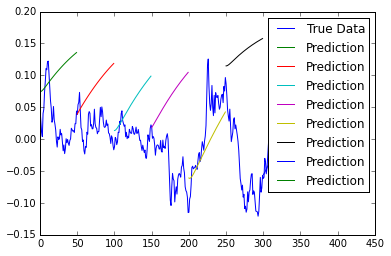

In [14]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)